In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
N=int(input("Enter the Total Population :"))
I0=int(input("Enter the initial number of Infected :"))
R0=int(input("Enter the initial number of Recoveried :"))
S0=N-I0-R0
beta=float(input("Enter the Beta Value :"))
gamma=float(input("Enter the Gamma Value :"))
print(S0,I0,R0)
print(beta,gamma)

Enter the Total Population :125_00_00_000
Enter the initial number of Infected :1
Enter the initial number of Recoveried :0
Enter the Beta Value :0.2
Enter the Gamma Value :0.1
1249999999 1 0
0.2 0.1


In [13]:
t=np.linspace(0,100)
def sir(y,t,N,beta,gamma):
    S,I,R=y
    dSdt=-beta*S*I/N
    dIdt=beta*S*I/N-gamma*I
    dRdt=gamma*I
    return dSdt,dIdt,dRdt

In [14]:
from scipy.integrate import odeint
y0=S0,I0,R0
ret=odeint(sir,y0,t,args=(N,beta,gamma))
S,I,R=ret.T

In [15]:
df_SIR=pd.DataFrame({"S":S,"I":I,"R":R})
df_SIR.head()

,S,I,R
0,599995.000000,5.000000,0.000000
1,599981.587851,10.747914,7.664235
2,599952.759204,23.102147,24.138648
3,599890.802036,49.650603,59.547361
4,599757.685196,106.678389,135.636415


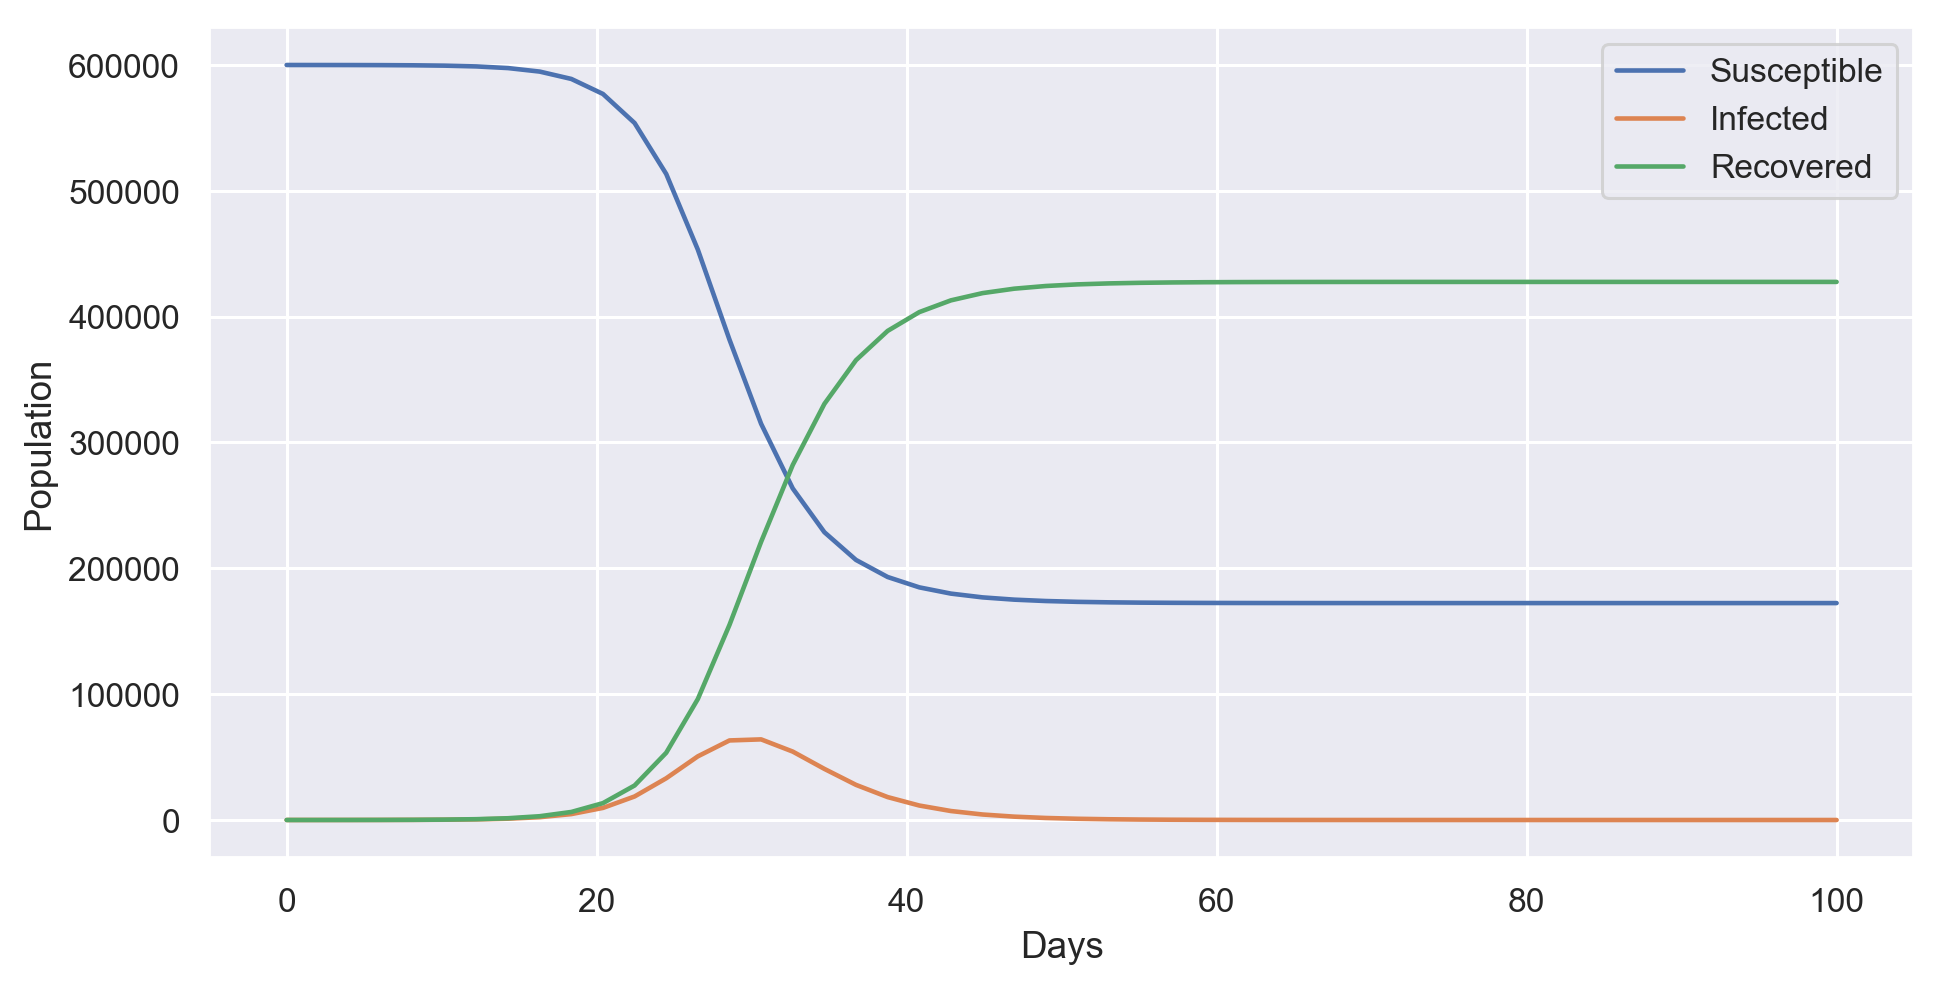

In [16]:
plt.figure(dpi=220,figsize=(10,5))
plt.plot(t,S)
plt.plot(t,I)
plt.plot(t,R)
plt.xlabel("Days")
#plt.yscale("log")
plt.ylabel("Population")
plt.legend(["Susceptible","Infected","Recovered"])
plt.show()

# Code in a single go

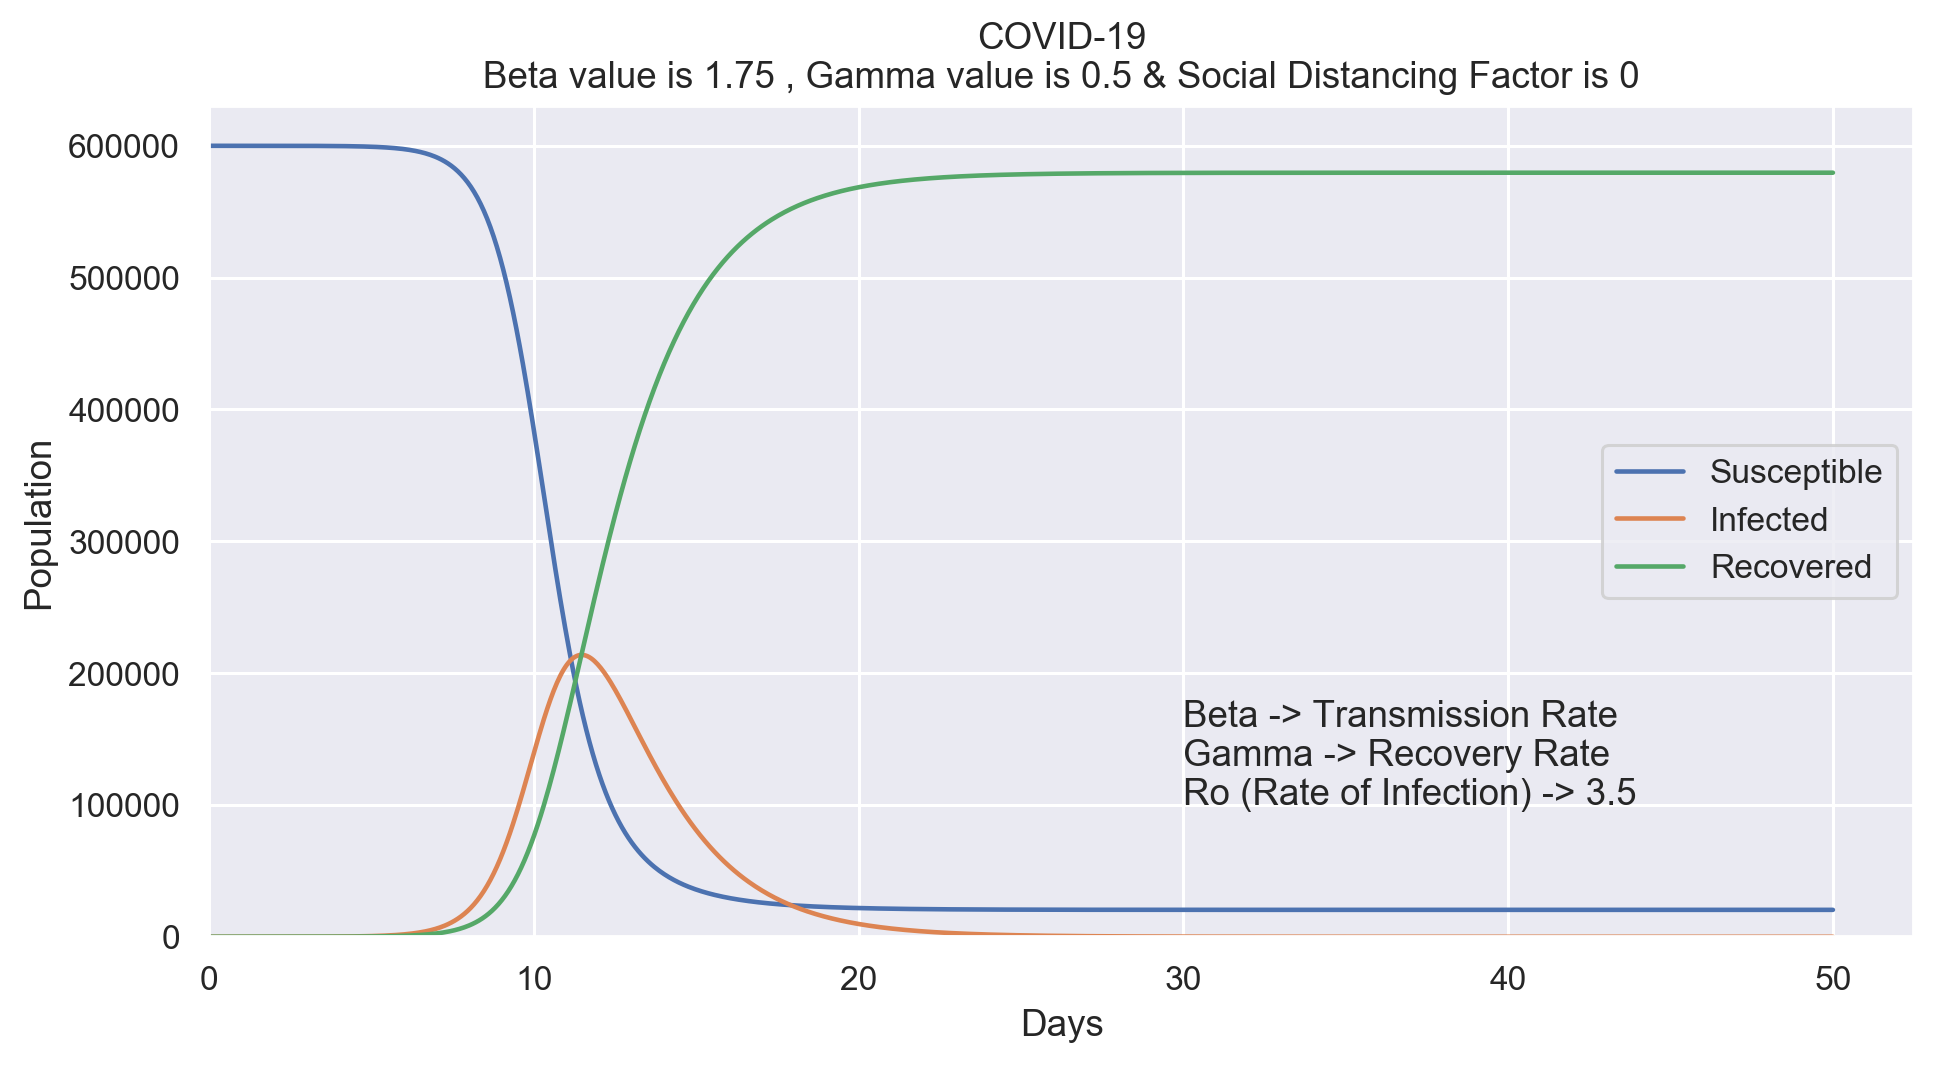

In [47]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.integrate import odeint
sns.set()

N=6_00_000
I0=1
R0=0

beta=1.75
gamma=0.5
sdf=0
sd=1-sdf

S0=N-I0-R0

t=np.linspace(0,50,1000)

def sir(y,t,N,beta,gamma):
    S,I,R=y
    dSdt=-sd*beta*S*I/N
    dIdt=sd*beta*S*I/N-gamma*I
    dRdt=gamma*I
    return dSdt,dIdt,dRdt
y0=S0,I0,R0
ret=odeint(sir,y0,t,args=(N,beta,gamma))
S,I,R=ret.T
df_SIR=pd.DataFrame({"S":S,"I":I,"R":R})

plt.figure(dpi=220,figsize=(10,5))
plt.plot(t,S)
plt.plot(t,I)
plt.plot(t,R)
plt.title("COVID-19\nBeta value is {} , Gamma value is {} & Social Distancing Factor is {}".format(beta,gamma,sdf))
plt.xlabel("Days")
#plt.yscale("log")
#plt.xscale("log")
plt.ylabel("Population")
plt.xlim(left=0)
plt.ylim(bottom=5)
plt.legend(["Susceptible","Infected","Recovered"])
plt.text(30, 100000, "Beta -> Transmission Rate\nGamma -> Recovery Rate\nRo (Rate of Infection) -> {}".format((beta*sd)/gamma))
plt.show()

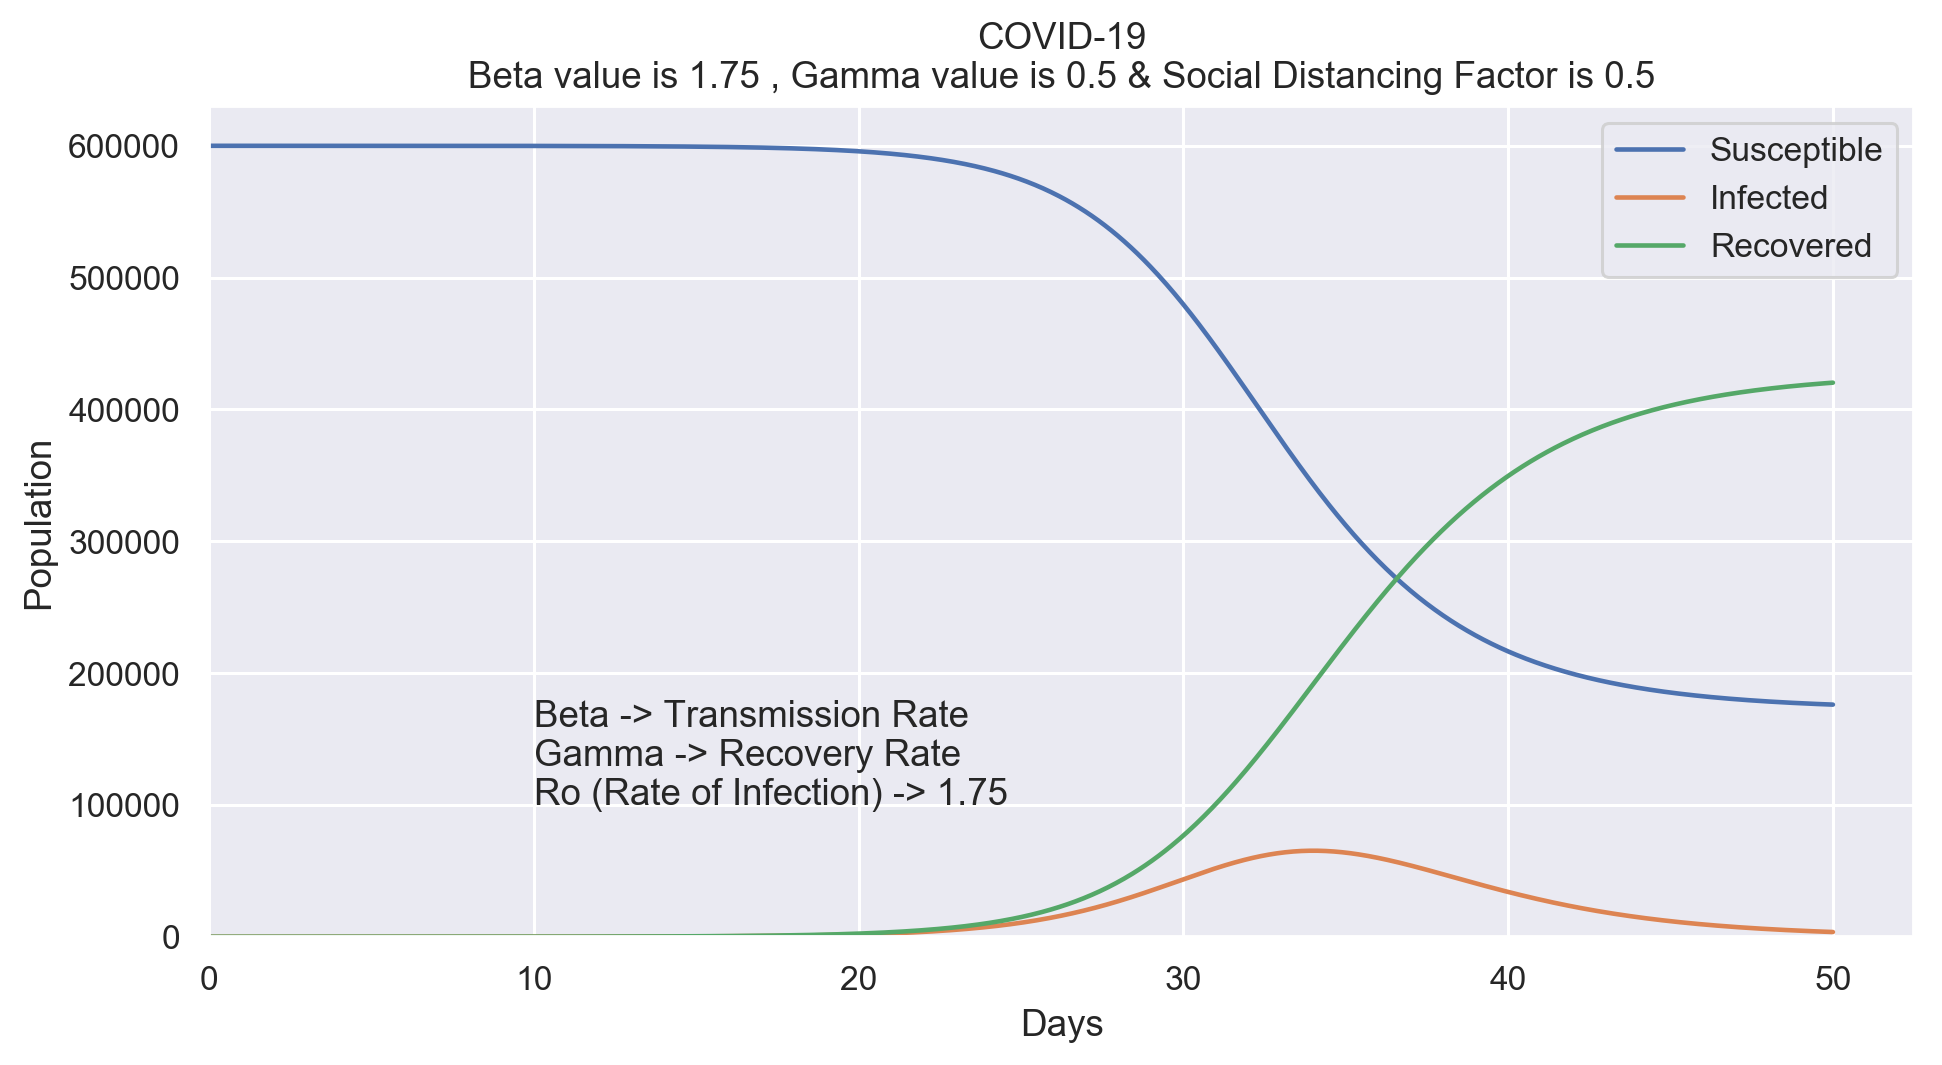

In [50]:
# After Social Distancing
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.integrate import odeint
sns.set()

N=6_00_000
I0=1
R0=0

beta=1.75
gamma=0.5
sdf=0.5
sd=1-sdf

S0=N-I0-R0

t=np.linspace(0,50,1000)

def sir(y,t,N,beta,gamma):
    S,I,R=y
    dSdt=-sd*beta*S*I/N
    dIdt=sd*beta*S*I/N-gamma*I
    dRdt=gamma*I
    return dSdt,dIdt,dRdt
y0=S0,I0,R0
ret=odeint(sir,y0,t,args=(N,beta,gamma))
S,I,R=ret.T
df_SIR=pd.DataFrame({"S":S,"I":I,"R":R})

plt.figure(dpi=220,figsize=(10,5))
plt.plot(t,S)
plt.plot(t,I)
plt.plot(t,R)
plt.title("COVID-19\nBeta value is {} , Gamma value is {} & Social Distancing Factor is {}".format(beta,gamma,sdf))
plt.xlabel("Days")
#plt.yscale("log")
#plt.xscale("log")
plt.ylabel("Population")
plt.xlim(left=0)
plt.ylim(bottom=5)
plt.legend(["Susceptible","Infected","Recovered"])
plt.text(10, 100000, "Beta -> Transmission Rate\nGamma -> Recovery Rate\nRo (Rate of Infection) -> {}".format((beta*sd)/gamma))
plt.show()